# Projekt - Uvod u znanost o podacima 
Ovaj dokument sadrži implementaciju projektnog zadatka kolegija "Uvod u znanost o podacima" na Fakultetu elektrotehnike i računarstva. Cilj ovog projekta je replicirati te na kraju poboljšati temu znanstvenog rada "Implementation of Machine Learning Model to Predict Heart Failure Disease."

# Opis projektnog zadataka
Cilj ovog projektnog zadatka je replicirati zatim poboljšati temu znanstvenog rada "Implementation of Machine Learning Model to Predict Heart Failure Disease". Svrha tog znanstvenog rada je razviti prediktivne modele u području medicine, točnije predvidjeti zastoj srca u pacijenta na temelju karakteristika istog pacijenta.

Projekt je podijeljen na četiri dijela:
 - 1. Priprema podataka
 - 2. Vizualizacija podataka
 - 3. Replikacija rezultata
 - 4. Poboljšanje rezultata
 


# 1. Priprema podataka

Podaci su početni korak svakog modela strojnog učenja, stoga potrebno je učitati i upoznati se s tim podacima. Podatkovni skup koji se koristi u implementaciji ovog projekta je "Heart Failure Prediction DataSet" , dostupan na sljedećoj poveznici: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction Prvi korak je učitati podatke. To ćemo učiniti putem Python biblioteke - "Pandas".

In [2]:
#Importing the necessery libarys
import pandas as pd
import numpy as np

U varijablu *data_set* ćemo učitati podatkovni skup. Pogledajmo dimenzije te varijable.

In [3]:
data_set=pd.read_csv("data/heart_cleveland_upload.csv")
print("The dimension of data set is : ",data_set.shape)

The dimension of data set is :  (297, 14)


Kao što je vidljivo u prijašnjem ispisu, vidimo da raspolažemo s 297 podatka , gdje je svaki od njih opisan s 14 varijabli. Na raspolaganju nemamo veliku količinu podatka, s obzirom na to da su modeli strojnog učenja nekada trenirani na podatkovnim skupovima od nekoliko milijuna zapisa. Bez obzira na malu količinu zapisa , i dalje možemo razviti adekvatan model strojnog učenja uz uvjet da su podaci u cijelosti ispravni. Prije provjere ispravnosti podataka pogledajmo pobliže prirodu našeg podatkovnog skupa.

In [4]:
print("Name of the columns: ",list(data_set.columns))

Name of the columns:  ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition']


Imena stupaca su engleske kratice koje opisuju pacijenta i njegovo zdravstveno stanje. Značenje pojedinog stupca se nalazi ispod:
- "age" = Starost ispitanika.
- "sex" = Spol ispitanika.
- "cp" = Razina boli u plućima.
- "trestbps" = Vrijednost krvnog tlaka ispitanika.
- "chol" = Razina kolesterola ispitanika.
- "fbs" = Razina šećera u krvi.
- "restecg" = Rezultat ECG-a pacijenta.
- "thalach" = Najveća vrijednost otkucaja srca u pacijenta.
- "Exang" = Zastavica , koja govori da li vježba uzrokuje upalu grla
- "oldpeak" = Vrijednost koja predstavlja utjecaj depresije na pacijenta.
- "slope" = Zastavica koja predstavlja stanje ispitanika tijekom fizičke aktivnosti
- "ca" = Vrijednost fluoroskopije.
- "thal" = Rezultati Thallium testa (testa za pacijente s poteškoćama u disanju).
- "condition" = Label stupac, koji govori da li je pacijent podložan zastoju srca.

Devet varijabla našeg skupa su kategorijskog tipa. Npr. stupac "cp" koji predstavlja bol u prsima, može poprimiti vrijednost 0,1,2 ili 3. Svaka od tih vrijednosti predstavlja intezitet boli u prsima kod pojedinog pacijenta. Slično vrijedi za dio ostalih varijabli, ali prije nego što pregledamo njihovo ponašanje  pogledajmo s kojim tipom podataka raspolažemo.

In [5]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


Iz gornjeg ispisa vidljivo je da raspolažemo isključivo s numeričkim podacima. Već smo naglasili da su par varijabli kategorijskog tipa kao npr: condition,sex,cp,fbs... 
Iz gornjeg ispisa također vidimo da podaci koji predstavljaju kategorije su već u int64 formatu. To je važno. jer sve kategorijske i binarne varijable u podatkovnom skupu moraju biti numeričkog tipa. U slučaju da nisu bile int64 tipa, to bismo morali ispraviti koristeći OneHotEncoder i LabelEncoder. <br>
U gornjem ispisu možemo također zaključiti da u našem podatkovnom skupu nisu prisutne nedostajuće vrijednosti. 
NaN vrijednosti mogu predstavljati veliku opasnost u izradi modela strojnog učenja i oni zahtijevaju delikatno rukovanje. Moguće ih je zamijeniti sa srednjom vrijednosti ili medijanom. Taj proces ovdje nećemo raditi jer nije potreban.<br>
Pogledajmo sada ponašanje naših numeričkih podataka.

In [6]:
data_set.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Tablica iznad nam daje dobar pregled ponašanja svih varijabli. Iz nje također možemo vidjeti koji su kandidati za stršeće vrijednosti ako usporedimo srednju vrijednost, min i max vrijednost stupca.
U našem podatkovnom skupu postoje dva kandidata za stršeće vrijednosti. To su varijable "chol" , i "oldpeak". Uočimo da maksimalna vrijednost varijable "chol" i "oldpeak" mnogo odstupa od ostalih vrijednosti tih varijabla. Pogledajmo dodatno ponašanje tih varijabla ,ali ovaj put putem box-plot grafa.<br>
Box-plot se sastoji od pravokutnika koji prikazuje podatke od donjeg do gornjeg kvartila. Izgled box-plota ukazuje na stupanj
raspršenosti i asimetričnosti, te može pokazati outliere medu podacima.
Prvo ćemo ispitati vrijednost "chol", zatim vrijednost "oldpeak" varijable.

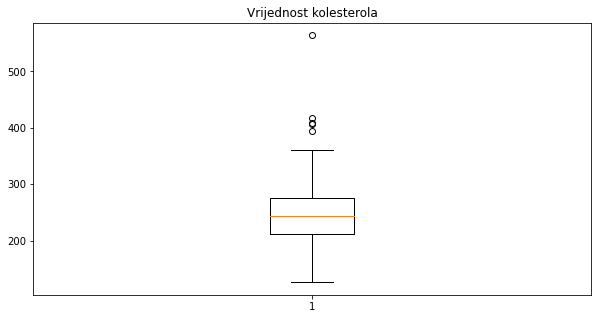

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize =(10, 5))
plt.title("Vrijednost kolesterola")
plt.boxplot(data_set["chol"])
# show plot
plt.show()

Iz gornjeg grafa vidljivo je da maksimalna vrijednost varijable "chol" predstavlja outlier. Pogledajmo bolje o kojem zapisu je točno riječ.

In [8]:
print(data_set[data_set["chol"]==564])

    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
79   67    0   2       115   564    0        2      160      0      1.6   

    slope  ca  thal  condition  
79      1   0     2          0  


Outlieri unutar podatkovnog skupa mogu predstavljati neispravne podatke. Ovdje se radi o jednom zapisu kojeg možemo izbrisati jer nosi potencijalno neispravne informacije.Nakon brisanja pogledajmo ponovno ponašanje varijable "chol"

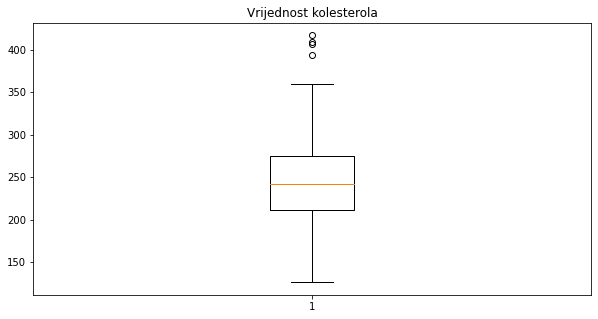

In [9]:
data_set.drop(data_set.index[(data_set["chol"]==564)],axis=0,inplace=True)
plt.figure(figsize =(10, 5))
plt.title("Vrijednost kolesterola")
plt.boxplot(data_set["chol"])
# show plot
plt.show()

Vidljivo  je poboljšanje u varijabli "chol".
Istu stvar ćemo sada napraviti za varijablu "oldpeak", koja predstavlja utjecaj depresije u pacijenta. Pogledajmo ponašanje te varijable na box-plot grafu.

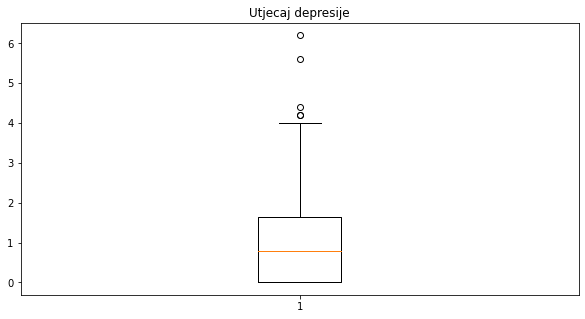

In [10]:
plt.figure(figsize =(10, 5))
plt.title("Utjecaj depresije")
plt.boxplot(data_set["oldpeak"])
# show plot
plt.show()

Vidimo da samo dva pacijenta imaju izrazito veliku vrijednost ove varijable. Prije brisanja ovih podataka prikažimo te podatke u cijelosti

In [11]:
print(data_set[data_set["oldpeak"]>5])

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
186   62    0   3       160   164    0        2      145      0      6.2   
239   55    1   3       140   217    0        0      111      1      5.6   

     slope  ca  thal  condition  
186      2   3     2          1  
239      2   0     2          1  


Utjecaj depresije je osjetljiva informacija kod osobe. Možemo pretpostaviti da visoka vrijednost te varijable u ova dva pacijenta je povezana za visokom šansom zastoja srca (condition=1). Zbog osjetljive prirode ove varijable i činjenice da su samo dva podatka u pitanju, ove zapise ćemo ostaviti u našem skupu.

Ispitivanje kolinearnosti među podacima našeg skupa je još jedna faza u pripremi podataka. Postoji nekoliko načina kako to napraviti. Ovdje ćemo to učiniti putem korelacijske matrice preko *seaborn* biblioteke.

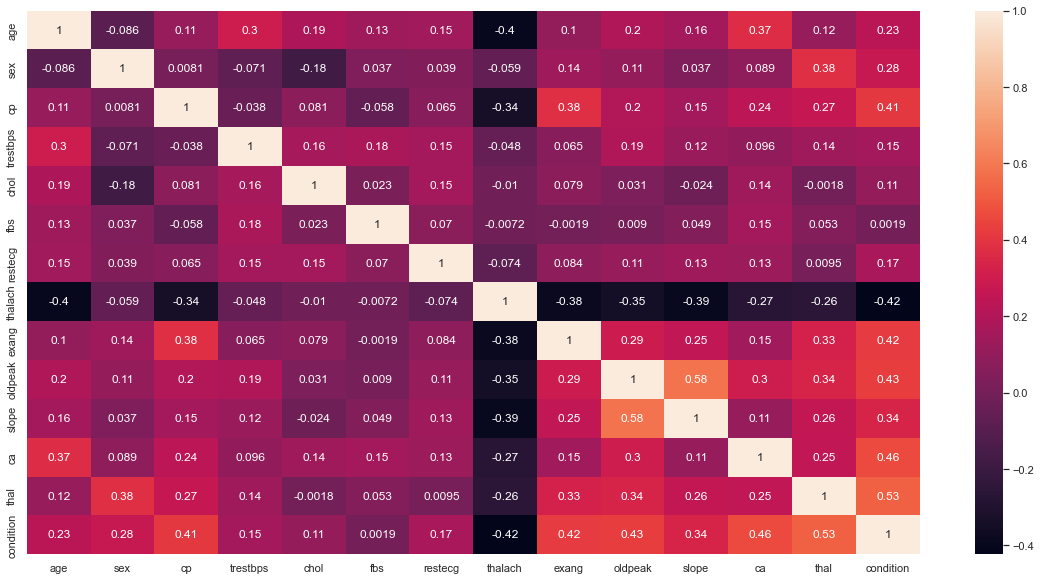

In [12]:
import seaborn as sns
corr_matrix = data_set.corr()
sns.set(rc={'figure.figsize':(20,10)})
sns.heatmap(corr_matrix, annot=True)
plt.show()

Visoke korelacijske vrijednosti nisu prisutne u našem podatkovnom skupu, i nije potrebno izbacivati varijable iz skupa.

Nakon korelacijske matrice, želimo ispitati monotone atribute našeg dataset-a. To ćemo učiniti s funkcijom nunique koja broji jedinstvene vrijednosti po stupcima.

In [13]:
data_set.nunique()

age           41
sex            2
cp             4
trestbps      50
chol         151
fbs            2
restecg        3
thalach       91
exang          2
oldpeak       40
slope          3
ca             4
thal           3
condition      2
dtype: int64

Iz gornjeg rezultata možemo zaključiti da naš podatkovni skup ne sadrži monotone varijable koje je potrebno izbaciti iz skupa podataka.

Nakon svih prethodni provjera možemo reći da je naš podatkovni skup ispravan i potpun. Napokon taj podatkovni skup možemo i predstaviti vizualno.

# 2. Vizualizacija podataka

Prvi stupac u našem podatkovnom skupu predstavlja starost ispitanika. Iz prijašnjeg poziva funkcije *data_set.describe()* znamo da je prosječna starost ispitanika 54.5 godina. Sada želimo detaljnije pogledati starost svih ispitanika našeg podatkovno skupa.Za tu svrhu iskoristit ćemo histogram.

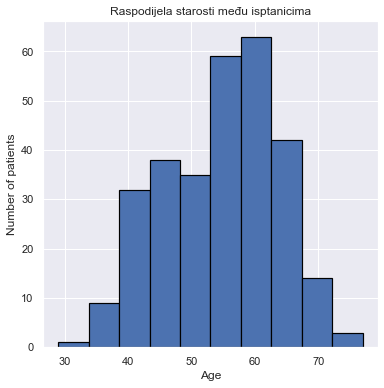

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.hist(data_set["age"], edgecolor='black',linewidth=1.2)
plt.xlabel('Age')
plt.ylabel('Number of patients')
plt.title('Raspodijela starosti među isptanicima')
plt.show()


Vidimo da je većina ispitanika starije životne dobi te da nemamo mladih ispitanika. To je i razumljivo s obzirom na to da radimo s podatkovnim skupom koji će služiti za predikciju zastoja srca, koji je više prisutan kod osoba starije životne dobe.<br>
Nakon starosti, ispitajmo kakav je omjer muških i ženskih ispitanika u našem skupu. Za tu vizualizaciju upotrijebit ćemo *Pie-Chart*.

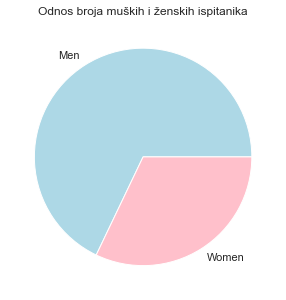

In [15]:
MF=data_set['sex'].value_counts()
MF.columns=["Men","Women"]
plt.figure(figsize=(5,5))
plt.pie(data_set['sex'].value_counts(),labels=["Men","Women"],colors=["lightblue","pink"],)
plt.title("Odnos broja muških i ženskih ispitanika")
plt.show()

Broj muškaraca je znatno veći od broja žena. Danas su mnogo popularne usporedbe između muškaraca i žena. U ovom radu ćemo također pratiti trendove, ali pravit ćemo usporedbe na temelju zdravstvenih podataka koje imamo na raspolaganju.
Započnimo sa zadnjim stupcem condition, čija vrijednost predstavlja visoku(condition = 1) ili nisku šansu (condition = 0) zastoja srca. Pogledajmo kakav je omjer tih šansi kod žena i kod muškaraca.

[112, 89]
[25, 70]


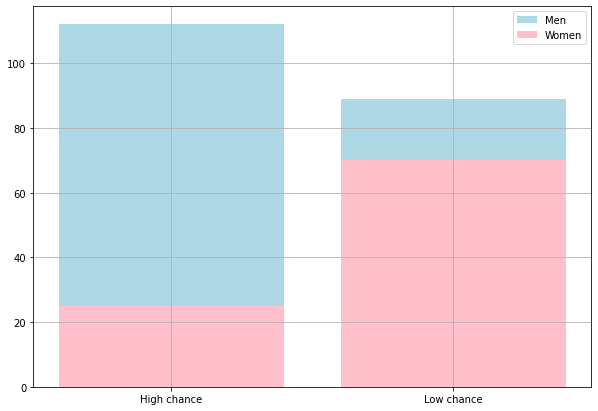

In [10]:
men_with_highC_HF=data_set[data_set["sex"]==1]
men_with_highC_HF=men_with_highC_HF[men_with_highC_HF['condition']==1]

women_with_highC_HF=data_set[data_set["sex"]==0]
women_with_highC_HF=women_with_highC_HF[women_with_highC_HF['condition']==1]

##Calculate data with low chance of heart-failure
men_with_lowC_HF=data_set[data_set["sex"]==1]
men_with_lowC_HF=men_with_lowC_HF[men_with_lowC_HF['condition']==0]

women_with_lowC_HF=data_set[data_set["sex"]==0]
women_with_lowC_HF=women_with_lowC_HF[women_with_lowC_HF['condition']==0]

men=[len(men_with_highC_HF),len(men_with_lowC_HF)]
women=[len(women_with_highC_HF),len(women_with_lowC_HF)]
print(men)
print(women)
x_asis=["High chance","Low chance"]
plt.figure(figsize=(10,7))
plt.bar(x_asis, men, color='lightblue', label='Men')
plt.bar(x_asis, women, color='pink', label='Women')
plt.legend(loc='best')
plt.grid()

Iz iznad prikazanog bar-charta možemo zaključiti da je zastoj srca znatno više prisutan kod muškaraca.Bez obzira na to što graf iznad ukazuje da je veća vjerojatnost zastoja srca kod muškaraca, treba imati na umu da podaci nisu u jednakim omjerima te nije ispravno oslanjati se isključivo na vizualizaciju našeg skupa prilikom zaključivanja odnosa između varijabla.Razumljivo je da broj muškaraca prevladava broj žena u obje kategorije, jer njih ima puno više u našem skupu. Prilikom izrade modela strojnog učenja važno je ostvariti ravnomjernu podjelu između dva skupa.

Prilikom opisa podatkovnog skupa naglasili smo da stupac *chol* predstavlja razinu kolesterola. Sada želimo ispitati kako se vrijednost te varijable mijenja u odnosu na starost ispitanika. Tu promjenu ćemo prikazati posebno za žene i muškarce te na grafovima će biti vidljiva razlika između pacijenata s visokom i niskom šansom zastoja srca.

Text(0, 0.5, 'Vrijednost kolesterola')

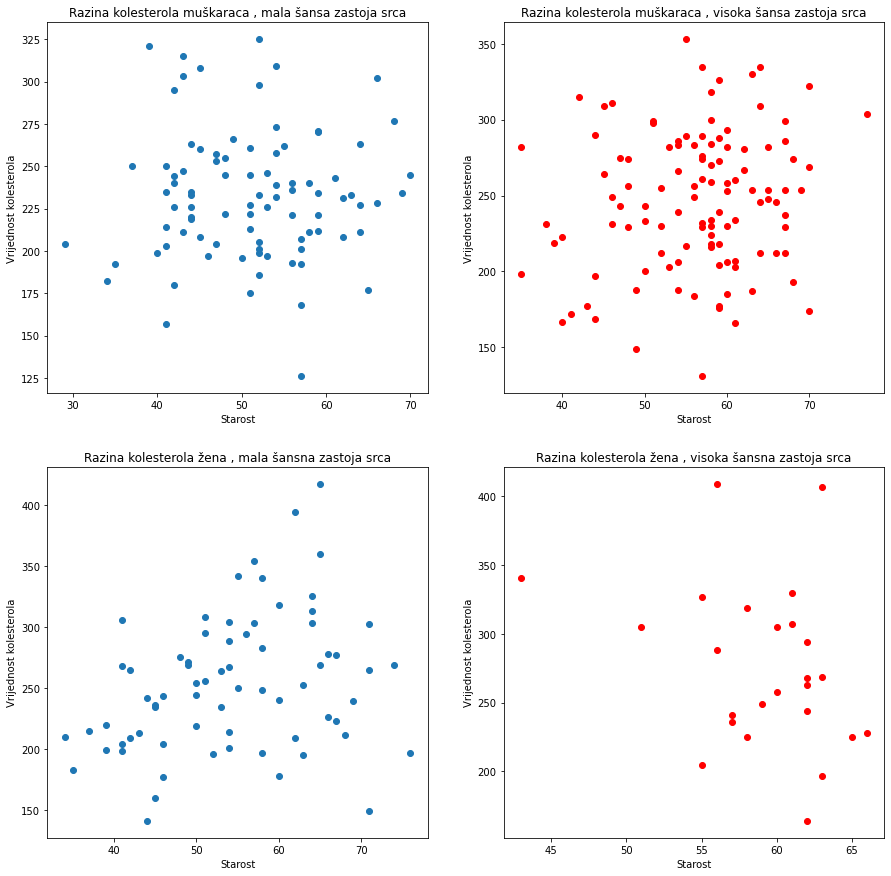

In [21]:
fig, ax = plt.subplots(2, 2,figsize=(15,15))

#Plot graph for men with low chance of HF and chol levels
men_lowC_chol = men_with_lowC_HF["chol"]
age_menLowCCP =np.array(men_with_lowC_HF['age'])


ax[0,0].scatter(age_menLowCCP,men_lowC_chol)
ax[0,0].set_title("Razina kolesterola muškaraca , mala šansa zastoja srca")
ax[0,0].set_xlabel("Starost")
ax[0,0].set_ylabel("Vrijednost kolesterola")

#Plot grapf with high chance of HF and chest pain , and compare results with previous graph
men_highC_chol = men_with_highC_HF["chol"]
age_menHighCCP =np.array(men_with_highC_HF['age'])

ax[0,1].scatter(age_menHighCCP,men_highC_cp,color="red")
ax[0,1].set_title("Razina kolesterola muškaraca , visoka šansa zastoja srca")
ax[0,1].set_xlabel("Starost")
ax[0,1].set_ylabel("Vrijednost kolesterola")


#Plot graph for women with low chance of HF and their chol levels
women_lowC_chol = women_with_lowC_HF["chol"]
age_womenLowCCP =np.array(women_with_lowC_HF['age'])

ax[1,0].scatter(age_womenLowCCP,women_lowC_chol)
ax[1,0].set_title("Razina kolesterola žena , mala šansna zastoja srca")
ax[1,0].set_xlabel("Starost")
ax[1,0].set_ylabel("Vrijednost kolesterola")

#Plot grapf with high chance of HF  and their chol levels , and compare results with previous graph
women_highC_chol=women_with_highC_HF["chol"]
age_womenHighCCP =np.array(women_with_highC_HF['age'])

ax[1,1].scatter(age_womenHighCCP,women_highC_chol,color="red")
ax[1,1].set_title("Razina kolesterola žena , visoka šansna zastoja srca")
ax[1,1].set_xlabel("Starost")
ax[1,1].set_ylabel("Vrijednost kolesterola")


Ako pogledamo pobliže grafove možemo potvrditi da postoji povezanost između starosti i razine kolesterola. Naravno ta povezanost je jača na nekim grafovima ,a slabija na drugim.<br>
Sada želimo pokazati koliko dob nekog pacijenta utječe na vrijednost kolesterola ,ali ovaj put da ne pravimo nikakve podijele unutar našeg skupa. Na istom grafu prikazat ćemo utjecaj starosti na vrijednost kvnog tlaka pacijenta.

<Figure size 720x720 with 0 Axes>

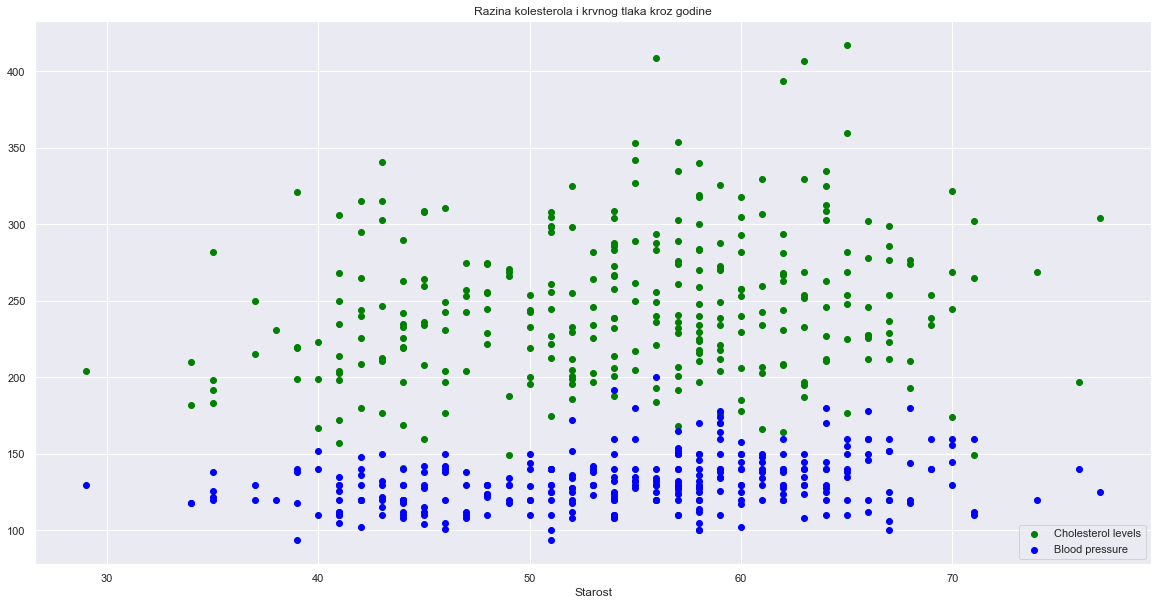

<Figure size 720x720 with 0 Axes>

In [23]:
age_values=data_set["age"]
chol_values=data_set["chol"]
bps_values=data_set["trestbps"]
plt.scatter(age_values,chol_values,color="green", label="Cholesterol levels")
plt.scatter(age_values,bps_values,color="blue", label="Blood pressure")
plt.title("Razina kolesterola i krvnog tlaka kroz godine")
plt.xlabel("Starost")
plt.legend(loc="lower right")
plt.figure(figsize=(10,10))

Vidljivo je da na temelju starost ne možemo predvidjeti razinu krvnog tlaka ili kolesterola osobe, jer osobe iste životne dobi imaju različite vrijednosti kolesterola i kvrnog tlaka. U prijašnjem grafu pokazali smo povezanost između starosti i razine kolesterola u određenim skupinama, ali ovdje ta povezanost nestaje ako gledamo podatkovni skup u cjelini.<br>
Pogledajmo sada kako otkucaj osobe utječe na razinu kolesterola i krvnog tlaka.

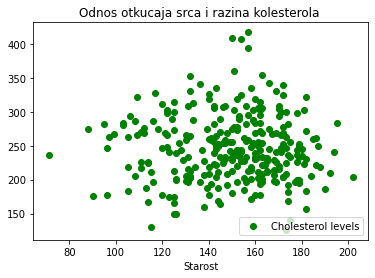

<Figure size 720x720 with 0 Axes>

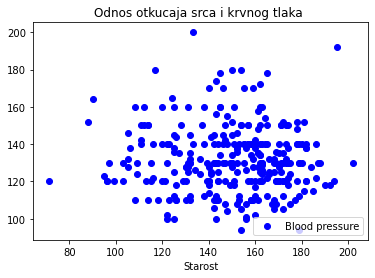

<Figure size 720x720 with 0 Axes>

In [26]:
heartB_values=data_set["thalach"]
chol_values=data_set["chol"]
bps_values=data_set["trestbps"]
plt.scatter(heartB_values,chol_values,color="green", label="Cholesterol levels")
plt.xlabel("Starost")
plt.legend(loc="lower right")
plt.title("Odnos otkucaja srca i razina kolesterola ")
plt.show()
plt.scatter(heartB_values,bps_values,color="blue", label="Blood pressure")
plt.title("Odnos otkucaja srca i krvnog tlaka ")
plt.xlabel("Starost")
plt.legend(loc="lower right")
plt.figure(figsize=(10,10))

Znanstveni rad kojeg smo predstavili na početku, sadrži modele koje predviđaju zastoj srca. Zbog toga u nastavku ćemo se više fokusirati na odnos varijable *condition* i ostalih varijabla u skupu. Više nećemo dijeliti podatkovni skup na ženske i muške ispitanike, te gledati odnos između drugih varijabla u podatkovnog skupu.<br>
Pogledajmo sada prosječnu razinu otkucaja srca te kako se ona razlikuje kod osoba s visokom i niskom šansom zastoja srca.

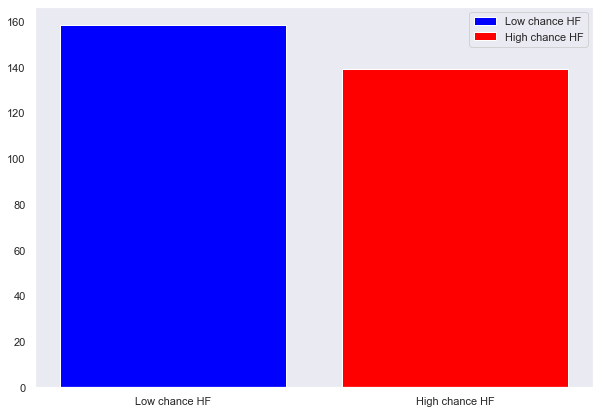

In [51]:
high_chanceHF=data_set[data_set["condition"]==1]
low_chanceHF=data_set[data_set["condition"]==0]
x_asis=["High chance HF","Low chance HF"]

y_HC=np.array(high_chanceHF["thalach"])
y_LC= np.array(low_chanceHF["thalach"])   
               
plt.figure(figsize=(10,7))
plt.bar(x_asis[1],np.mean(y_HC), color='blue', label='Low chance HF')
plt.bar(x_asis[0],np.mean(y_LC), color='red', label='High chance HF')
plt.legend(loc='best')
plt.grid()


Vidimo da osobe s niskom šansom za zastoj srca imaju prosječan otkucaj srca 160 , dok osobe s visokom šansom zastoja srca imaju prosječan otkucaj srca 140. Ova razlika nije velika, ali ipak predstavlja jednu različitost kod ovih kategorija.<br>
Iste razlike ćemo ispitati za ostale varijable u našem podatkovnom skupu.

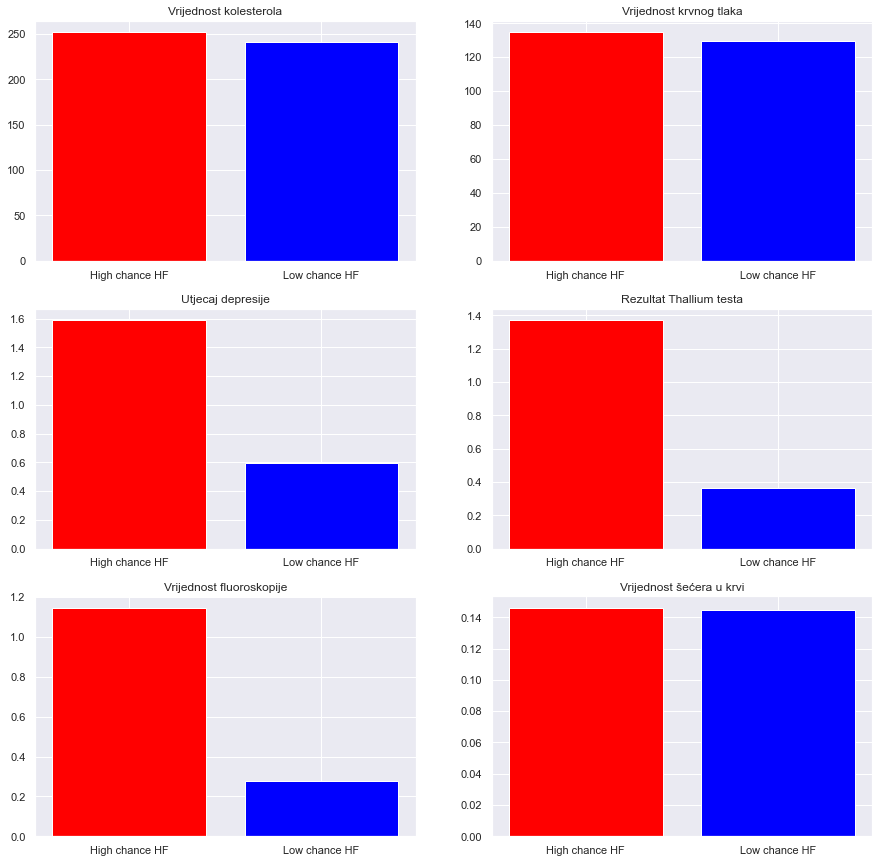

In [77]:
high_chanceHF=data_set[data_set["condition"]==1]
low_chanceHF=data_set[data_set["condition"]==0]
y_HC=np.array(high_chanceHF["chol"])
y_LC= np.array(low_chanceHF["chol"])   
               
fig, ax = plt.subplots(3, 2,figsize=(15,15))

# Index 4 Axes arrays in 4 subplots within 1 Figure: 
ax[0, 0].bar(x_asis,[np.mean(y_HC),np.mean(y_LC)], color=["red","blue"])
ax[0, 0].set_title('Vrijednost kolesterola')

y_HC=np.array(high_chanceHF["trestbps"])
y_LC= np.array(low_chanceHF["trestbps"])  
ax[0, 1].bar(x_asis,[np.mean(y_HC),np.mean(y_LC)], color=["red","blue"])
ax[0, 1].set_title('Vrijednost krvnog tlaka')

y_HC=np.array(high_chanceHF["oldpeak"])
y_LC= np.array(low_chanceHF["oldpeak"])  
ax[1, 0].bar(x_asis,[np.mean(y_HC),np.mean(y_LC)], color=["red","blue"])
ax[1, 0].set_title('Utjecaj depresije')

y_HC=np.array(high_chanceHF["thal"])
y_LC= np.array(low_chanceHF["thal"])  
ax[1, 1].bar(x_asis,[np.mean(y_HC),np.mean(y_LC)], color=["red","blue"])
ax[1, 1].set_title('Rezultat Thallium testa')


y_HC=np.array(high_chanceHF["ca"])
y_LC= np.array(low_chanceHF["ca"])  
ax[2, 0].bar(x_asis,[np.mean(y_HC),np.mean(y_LC)], color=["red","blue"])
ax[2, 0].set_title('Vrijednost fluoroskopije')

y_HC=np.array(high_chanceHF["fbs"])
y_LC= np.array(low_chanceHF["fbs"])  
ax[2, 1].bar(x_asis,[np.mean(y_HC),np.mean(y_LC)], color=["red","blue"])
ax[2, 1].set_title('Vrijednost šećera u krvi')

plt.show()

Na tri grafa vidimo velike razlike između ispitanika s visokom šansom zastoja srca i onih s niskom šansom. Vidimo da osobe s većom vjerojatnosti imaju znatno veče vrijednosti u utjecaju depresije, rezultatu Thallium testa i fluoroskopije. Upravo te varijable mogu imati veliki utjecaj na razvijanje modela strojnog učenja <br>
Sljedeći korak je razviti modele koji će predvidjeti zastoja srca.